In [ ]:
!git restore .

In [ ]:
!git pull origin main

In [ ]:
!pip install xgboost shap

In [ ]:
from build_baseline_model import main

In [ ]:
output = main()

In [ ]:
output['metrics']

   ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/297.1 MB 120.9 MB/s eta 0:00:03Downloading xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl (297.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.7 MB/s eta 0:00:00:00:01


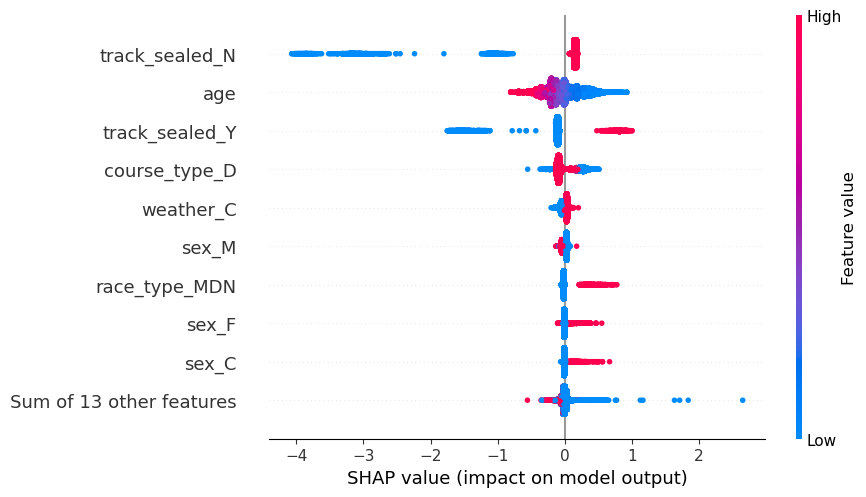

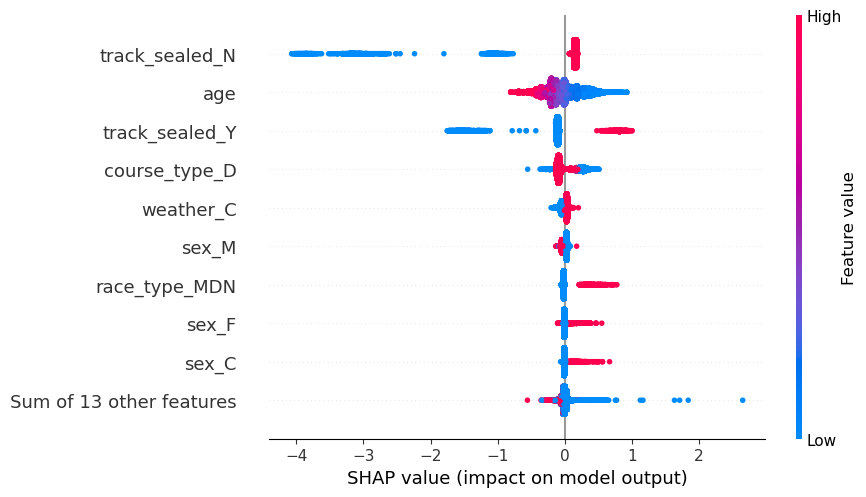

In [7]:


shap.initjs()
explainer = shap.TreeExplainer(xgb_model)


explanation = explainer(df[xgb_model.feature_names_in_].sample(frac=0.05))
shap.plots.beeswarm(explanation, max_display=10)


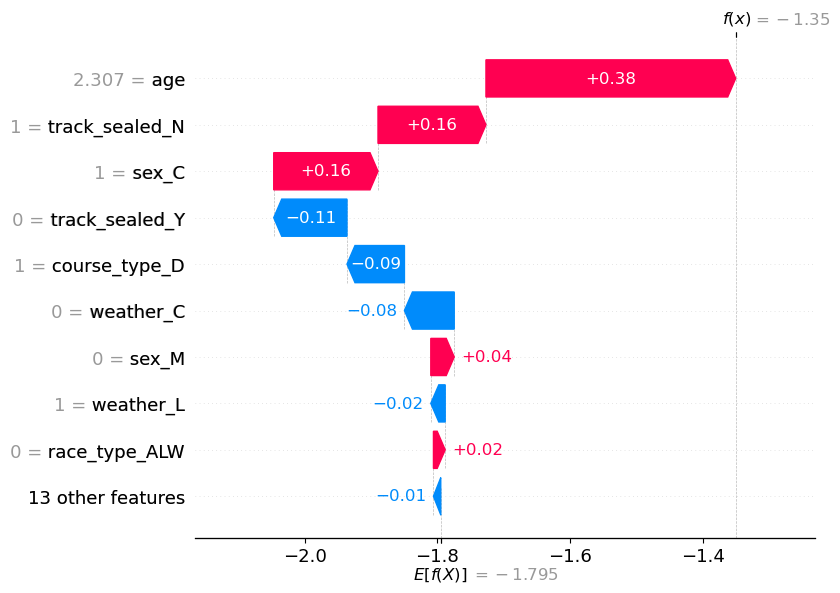

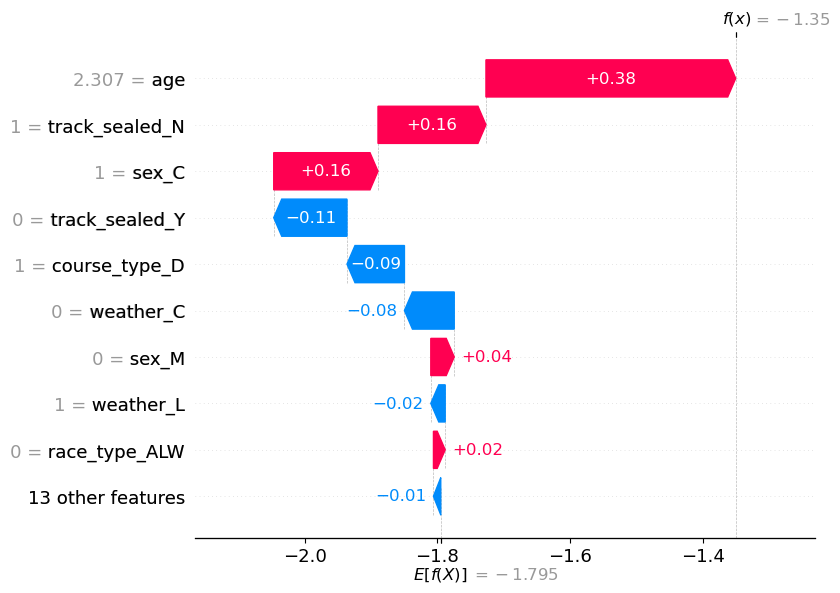

In [55]:
shap.plots.waterfall(explanation[5001])

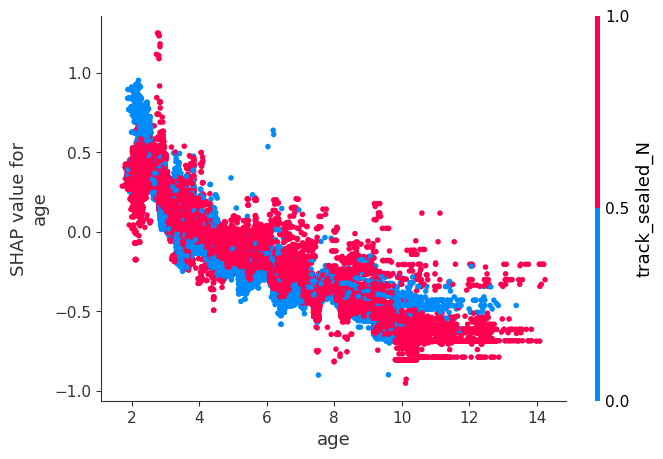

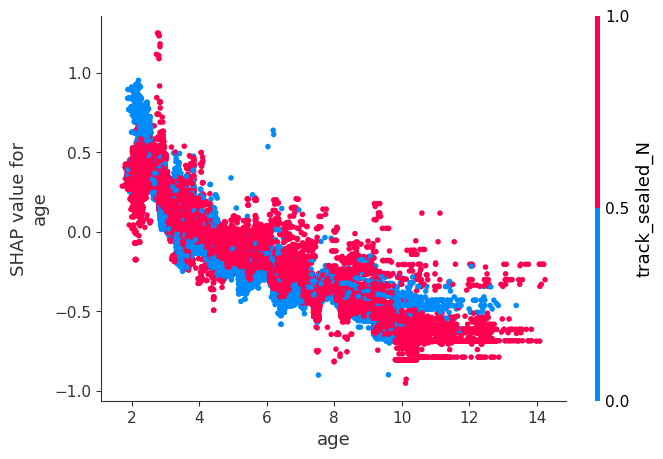

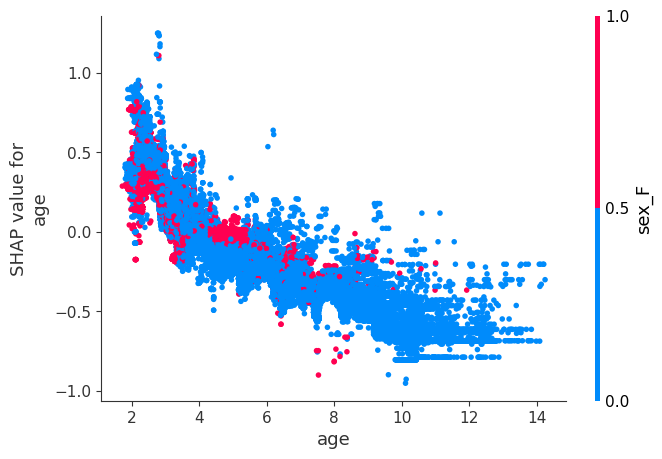

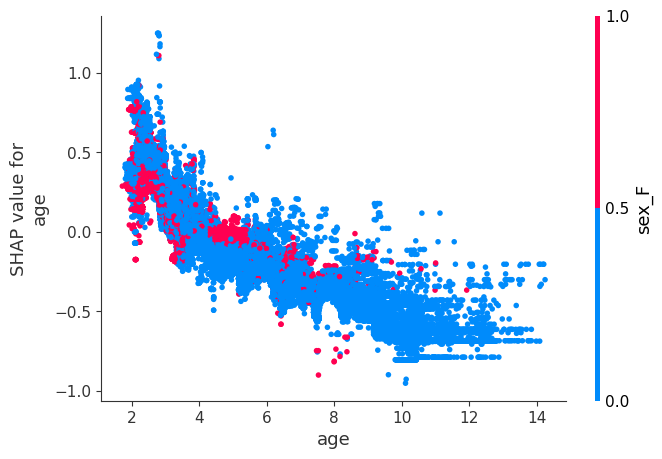

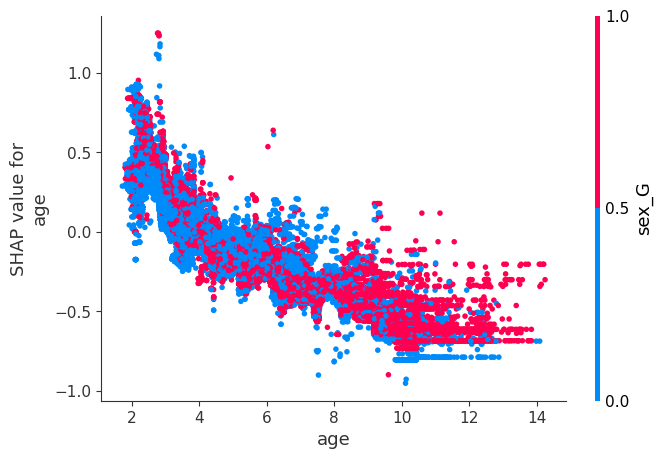

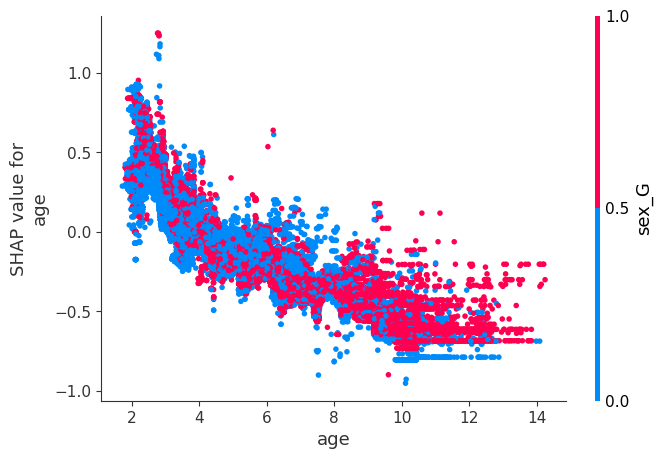

In [46]:
inds = shap.approximate_interactions("age", shap_values, df[xgb_model.feature_names_in_])

# make plots colored by each of the top three possible interacting features
for i in range(3):
    shap.dependence_plot("age", shap_values, df[xgb_model.feature_names_in_], interaction_index=inds[i])